# Implementing Support Vector Machine for Cat and Dog Image Classification

## Introduction
In this document, we'll explore the implementation of a Support Vector Machine (SVM) for classifying images of cats and dogs. We'll be using a dataset sourced from Kaggle, aiming to train a model capable of distinguishing between these two animal categories.

## Dataset Description
The Kaggle dataset consists of a collection of images labeled as either cats or dogs. Each image is of varying dimensions and comes with its corresponding label. Before training our SVM model, we'll preprocess the images to ensure they are suitable for the classification task.

## Implementation Steps
1. **Data Loading**: Load the dataset of cat and dog images.
2. **Data Preprocessing**: Resize images to a uniform size, convert them to grayscale, and normalize pixel values.
3. **Feature Extraction**: Extract features from the preprocessed images (e.g., using HOG or deep features).
4. **Model Training**: Train the SVM model using the extracted features.
5. **Model Evaluation**: Evaluate the trained SVM model on a separate test dataset to assess its performance.

## import libraries

In [99]:
# Data Manipulation
###################################################################################
import pandas as pd
import numpy as np

# Operating System
###################################################################################
import os

# Image processing
###################################################################################
import cv2

# Visualization
###################################################################################
import matplotlib.pyplot as plt
import seaborn as sns 
# from mlxtend.plotting import plot_decision_regions

# Feature Extraction
#===========================================================================
from skimage.feature import hog,local_binary_pattern

# Model
#===========================================================================
from sklearn.svm import SVC

# Data Preprocessing 
#===========================================================================
from skimage import exposure
from skimage.transform import rotate
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from skimage.transform import resize


# hyperparameter tuning
#===========================================================================
from sklearn.model_selection import RandomizedSearchCV

# Metrics 
#===========================================================================
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# D.R 
#===========================================================================
from sklearn.decomposition import PCA

# Export Data
#===========================================================================
import pickle

# Random 
#===========================================================================
import random

## Load Images

In [100]:
dir_path = "C:/Users/Lenovo/Documents/iaii/machine learning/INTERNSHIP/prodigy_infotech/PRODIGY_ML_03/train"
categories=['cat','dog']

In [101]:
data=[]

for category in categories:
    path=os.path.join(dir_path,category)
    label=categories.index(category)
    try:
        for img in os.listdir(path):
            imgpath=os.path.join(path,img)
            pet_img=cv2.imread(imgpath,0)
            pet_img=cv2.resize(pet_img, (50,50)) # All Image are in the same shape 
            image=np.array(pet_img).flatten() # Single Array not Multi Dimintion 2 or Above 

            data.append([image,label])
    except Exception as e:
        pass        
   


In [102]:
len(data)

4824

In [103]:
pickle_in = open('data1.pickel','wb')
pickle.dump(data,pickle_in)
pickle_in.close()

**import data from pickle**

In [104]:
pickle_in=open('data1.pickel','rb')
data=pickle.load(pickle_in)
pickle_in.close()

In [105]:
random.shuffle(data)
Features=[]
labels=[]


for feature,label in data:
    Features.append(feature)
    labels.append(label)
    

In [106]:
X_train, X_test, y_train, y_test = train_test_split(Features, labels, test_size=0.20, random_state=42)

**Train the model**

In [107]:
svm_model = SVC(C=1,gamma='auto',kernel='poly')
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [108]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

In [109]:
print('Prediction is : ' ,categories[y_pred_test[0]])

Prediction is :  cat


**Evaluate the model**

In [110]:
svm_model.score(X_test,y_test)

0.5865284974093264

for good scrore try to use a huge dataset

In [111]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.5865284974093264


In [112]:
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

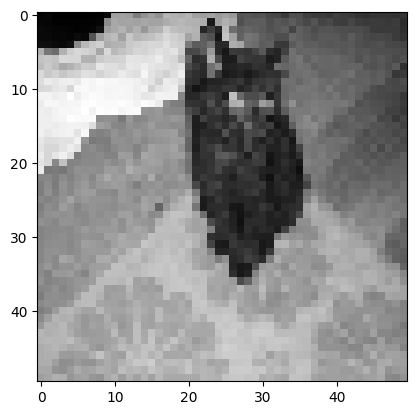

In [113]:
pet=X_test[0].reshape(50,50)
plt.imshow(pet,cmap='gray')
plt.show()

In [114]:
pick=open('model.sav','wb')
pickle.dump(svm_model,pick)
pick.close()

Text(120.72222222222221, 0.5, 'True Label')

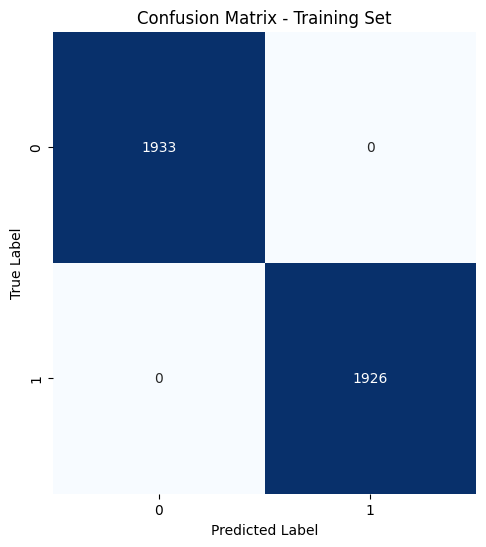

In [115]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

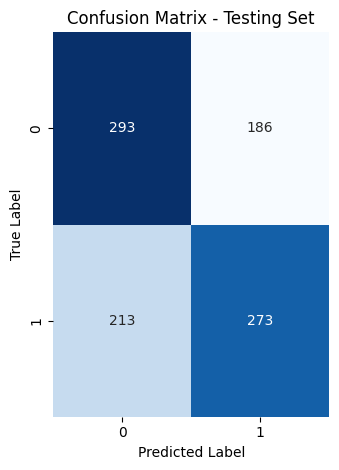

In [116]:
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()